# Multiple linear regression model for the prediction of demand for shared bikes

##### Problem statement:
To understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Business Goal:
1. You are required to model the demand for shared bikes with the available independent variables.
2. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
3. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [17]:
df = pd.read_csv("C:/Mamta Upgrad/Machine Learning/Assignment/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
#  statisitcal information
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [21]:
#  more descriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Observation
As we can see above all the datatypes are integer and float; however looking at the data there seems to be some fields that are categorical in nature but in integer type. We will analyse and convert them later to categorical values.
Additionally we can think of deleting some columns. But we will take that call later.

In [24]:
# Understanding the unique values
df.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

# Preprocessing the dataset

In [27]:
# Check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### As we can see there are no null values so we do not need to impute the values.
But we can see some of the names of the columns are not inuitive enough so lets change those names.

In [30]:
# drop dupliacte check
df.shape

(730, 16)

In [32]:
df.drop_duplicates(inplace=True)

In [34]:
df.shape

(730, 16)

In [36]:
# Renaming the column names:
df = df.rename(columns={'weathersit':'weather', 'yr':'year','mnth':'month','hum':'humidity','cnt':'count'})
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [38]:
# drop unnecessary columns
df_new = df.drop(columns=['instant','dteday','casual','registered'])
df_new.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [40]:
# change integer columns to category. This will assist us for future data processing.
cols = ['season','month','weekday','weather']
for col in cols:
    df_new[col] = df_new[col].astype('category')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


# One hot encoding

In [45]:
# Wherever we have more than 2 categories in categorical features, we need to create dummies for them

In [47]:
df_new.shape

(730, 12)

In [49]:
# creating dummies in the categorical columns
df_new_1 = pd.get_dummies(df_new, drop_first=True).astype(int)

In [51]:
# Understanding the shape of the df_new.
df_new_1.shape

(730, 30)

In [53]:
# Understanding the information about the columns in new dataframe df_new and checking if the dummies column has converted into integer type.
df_new_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        730 non-null    int32
 1   holiday     730 non-null    int32
 2   workingday  730 non-null    int32
 3   temp        730 non-null    int32
 4   atemp       730 non-null    int32
 5   humidity    730 non-null    int32
 6   windspeed   730 non-null    int32
 7   count       730 non-null    int32
 8   season_2    730 non-null    int32
 9   season_3    730 non-null    int32
 10  season_4    730 non-null    int32
 11  month_2     730 non-null    int32
 12  month_3     730 non-null    int32
 13  month_4     730 non-null    int32
 14  month_5     730 non-null    int32
 15  month_6     730 non-null    int32
 16  month_7     730 non-null    int32
 17  month_8     730 non-null    int32
 18  month_9     730 non-null    int32
 19  month_10    730 non-null    int32
 20  month_11    730 non-null    int3

# Splitting into train and test

In [56]:
# importing library related to splitting the data into train and test
from sklearn.model_selection import train_test_split

#  Splitting the input into train and test
df_train,df_test=train_test_split(df_new_1,train_size=0.70,test_size=0.30,random_state=100)

In [58]:
# Printing the shapes of the dataframes
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


# Exploratory data analysis on df_train

#### Visualising Numeric variables

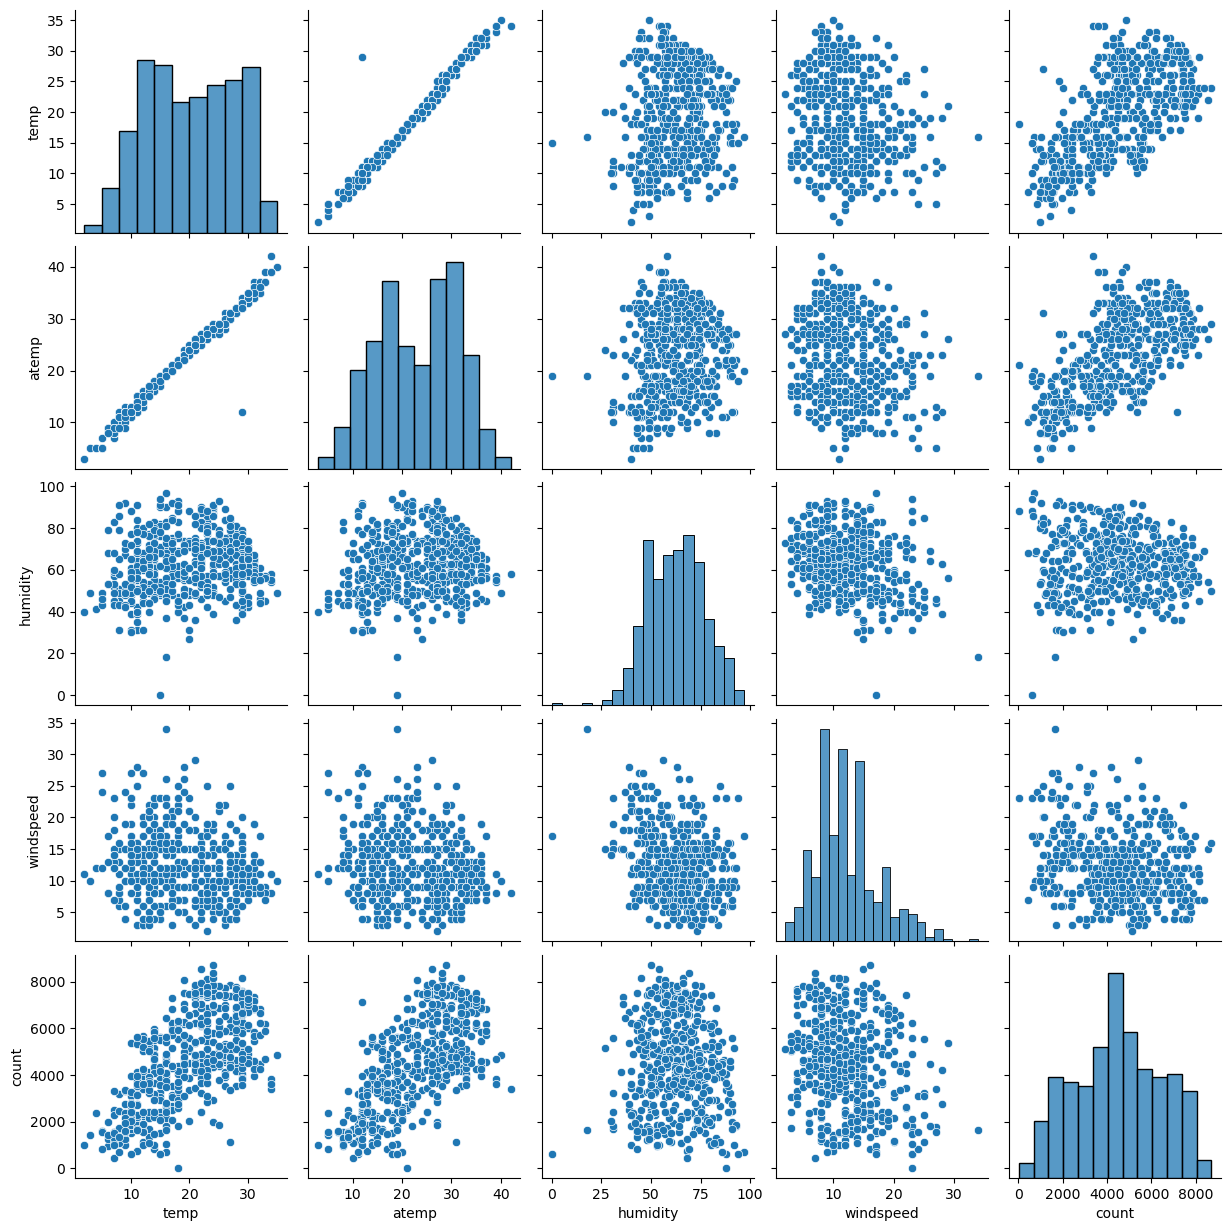

In [62]:
num_vars = df_train[['temp','atemp','humidity','windspeed','count']]
sns.pairplot(num_vars)
plt.show()

##### Observation:
It is evident from the above plots that there is a linear relationship between 'temp','atemp' and 'count'.

#### Visualising categorical variables

<Axes: xlabel='workingday', ylabel='count'>

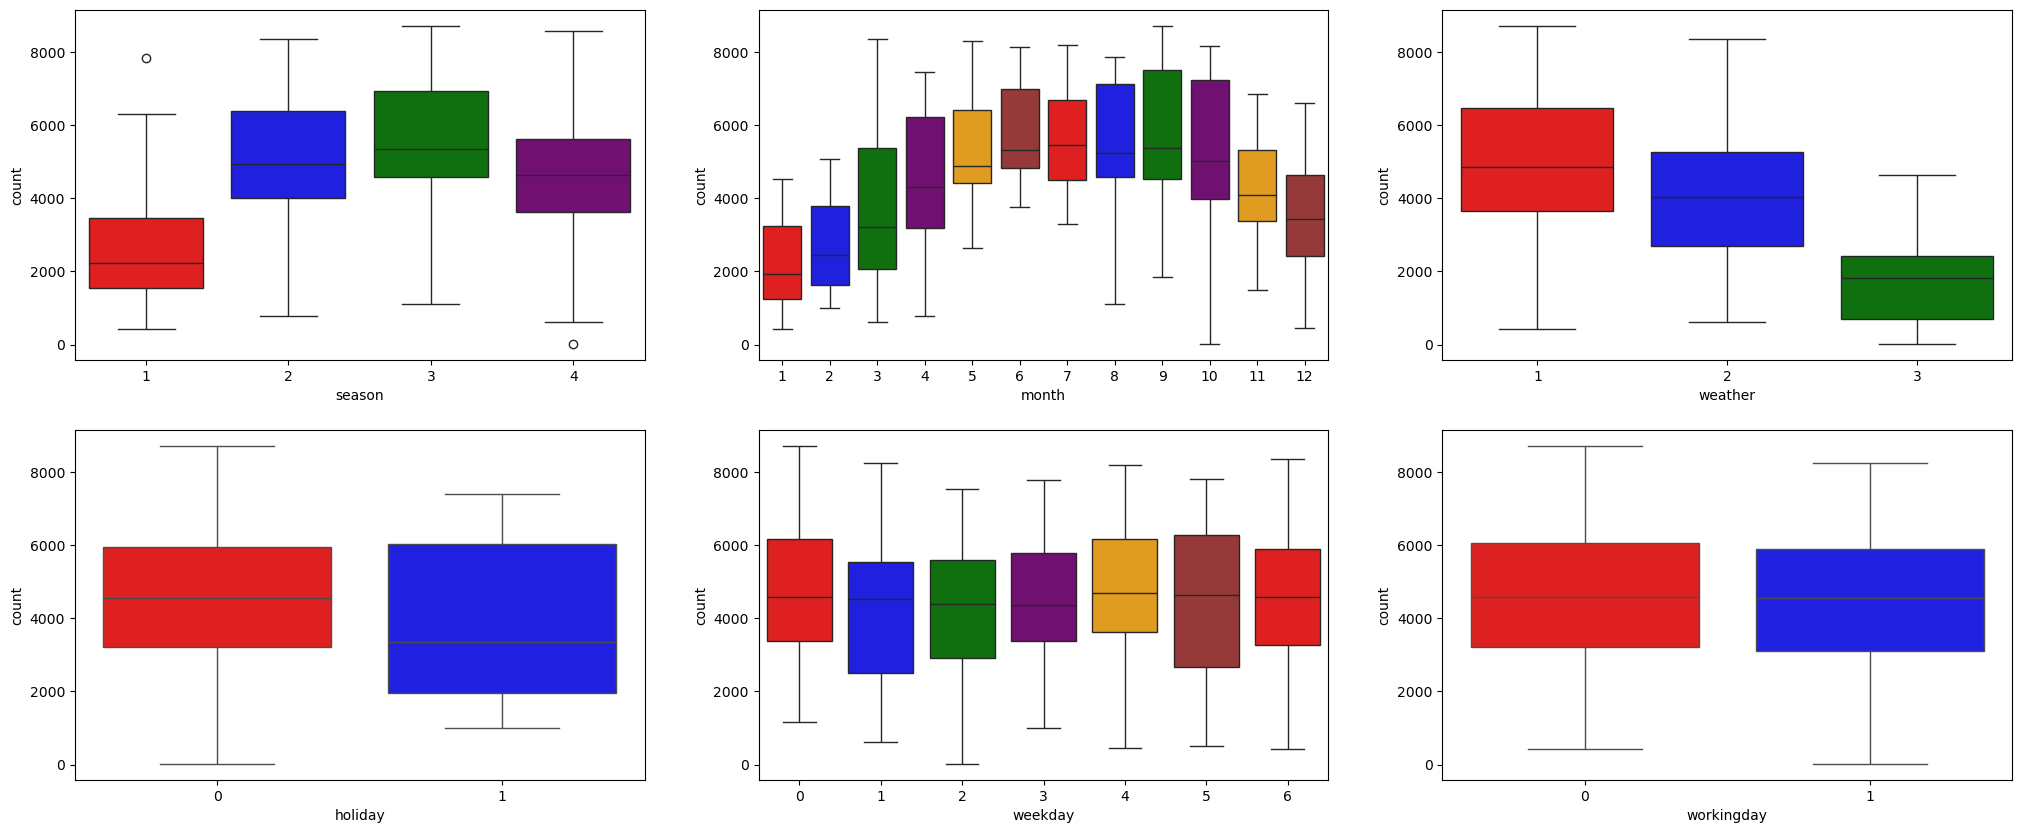

In [66]:
# We are using the dataframe df_new (created before creating dummies) to understand how each categorical variable is tacked up against target variable.

plt.figure(figsize=(25,10))
color = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data=df_new, palette = color)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data=df_new, palette = color)
plt.subplot(2,3,3)
sns.boxplot(x = 'weather', y = 'count', data=df_new, palette = color)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'count', data=df_new, palette = color)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data=df_new, palette = color)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data=df_new, palette = color)

##### Observation
Season - almost 32% bikes were booked in season 3 with a media of 5000 bookings; followed by season 2 and season 4.
Month - month no. 5,6,7,8,9,were giving the booking more than median value of 4000.
Weather - Weather 1 has the highest no. of bookings followed by 2 and then 3. So this could also be a good predictor for target variable.
Weekday - Shows almost flat trendline with a median booking between 4000 to 5000. So it may or may not be a predictor. Let it leave to the model to decide.

#### Multivariate analysis using correlation matrix

<Axes: >

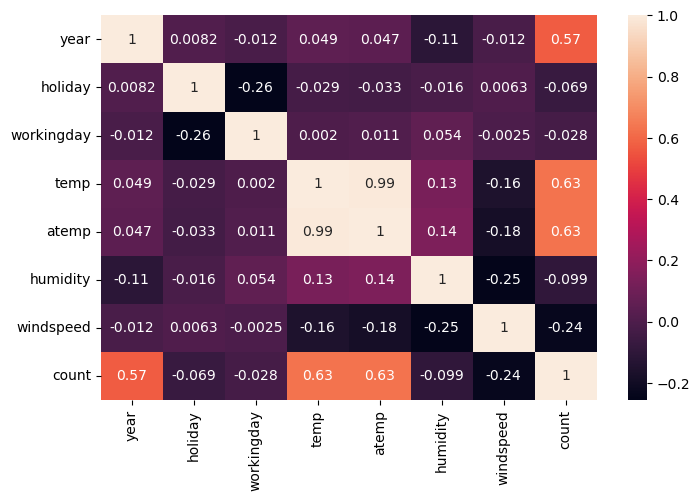

In [70]:
#  heatmap for understanding the relationship of numeric variables only.
plt.figure(figsize=(8,5))
num_df=df_new.select_dtypes(include=['int64','float64'])
corr = num_df.corr()
sns.heatmap(corr,annot = True)

#####  Observation
'count' is our target variable. There is a high correlation observed that of count with 'casual','registered','temp' and 'atemp'.However we will run the Linear regression model and ascertain the exact features which will predict the demand of the bikes.
We will refer this heatmap back and forth while building liner model along with VIFs and p-values.

# Scaling the 'train' dataframe

In [74]:
#  importing the library related to scaling the data. Here we will use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instatntiate an object
scaler=MinMaxScaler()

#  Scaling is to be done only on numeric features. We will fit and transform the train model ONLY.
df_train[['temp', 'atemp', 'humidity', 'windspeed','count']]=scaler.fit_transform(df_train[['temp', 'atemp', 'humidity', 'windspeed','count']])

In [76]:
# Check the details about df_train to ascertain the fit_transform has taken place properly.
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.533393,0.512066,0.645704,0.322794,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225123,0.207708,0.145907,0.165479,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.333333,0.536082,0.218750,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.525641,0.649485,0.312500,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.406250,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building our model

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn).

In [79]:
# Dividing the datafrem into X and y sets for the model building
y_train = df_train.pop('count')
X_train = df_train

#### RFE

In [83]:
# Importing RFE and LinearRegression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [85]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('month_2', False, 11),
 ('month_3', True, 1),
 ('month_4', False, 3),
 ('month_5', False, 2),
 ('month_6', False, 4),
 ('month_7', False, 12),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 13),
 ('month_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weather_2', True, 1),
 ('weather_3', True, 1)]

##### In the above list, the higher the number against the feature, the insignifant it is.
Hence we will pick up features those have written 1 against it.

In [88]:
# to list down all the features which are significant:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'season_2',
       'season_3', 'season_4', 'month_3', 'month_8', 'month_9', 'month_10',
       'weather_2', 'weather_3'],
      dtype='object')

In [90]:
# to list down all the features which are insignificant:
X_train.columns[~rfe.support_]

Index(['workingday', 'month_2', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_11', 'month_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [92]:
# Creating X_test dataframe using RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Regression model using statsmodels

#### Model 1

In [96]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)

# Running the linear model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Summary of the linear model
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.2
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          3.63e-188
Time:                        18:54:28   Log-Likelihood:                 512.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     494   BIC:                            -924.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2329      0.028      8.465      0.000       0.179       0.287
year           0.2293      0.008     28.247      0.000       0.213       0.245
holiday       -0.0896      0.026     -3.501      0.001      -0.140      -0.039
temp           0.4174      0.128      3.271      0.001       0.167       0.668
atemp          0.0808      0.133      0.607      0.544      -0.181       0.342
humidity      -0.1715      0.038     -4.528      0.000      -0.246      -0.097
windspeed     -0.1857      0.027     -6.917      0.000      -0.238      -0.133
season_2       0.1232      0.015      8.171      0.000       0.094       0.153
season_3       0.0417      0.023      1.844      0.066      -0.003       0.086
season_4       0.1508      0.014     10.688      0.000       0.123       0.179
month_3        0.0299      0.015      2.061      0.040       0.001       0.058
month_8        0.0505      0.018      2.859      0.004       0.016       0.085
month_9        0.1194      0.017      6.888      0.000       0.085       0.153
month_10       0.0417      0.018      2.381      0.018       0.007       0.076
weather_2     -0.0561      0.011     -5.336      0.000      -0.077      -0.035
weather_3     -0.2468      0.027     -9.280      0.000      -0.299      -0.195
==============================================================================
Omnibus:                       74.194   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.678
Skew:                          -0.763   Prob(JB):                     1.17e-38
Kurtosis:                       5.427   Cond. No.                         76.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,341.47
3,atemp,334.77
4,humidity,16.25
7,season_3,8.45
5,windspeed,3.94
6,season_2,3.50
8,season_4,3.09
13,weather_2,2.16
0,year,2.03
10,month_8,1.88


#### Model 2

##### Removing 'atemp' varibale besis high p-value and high VIF

In [103]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

In [105]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lm2 = sm.add_constant(X_train_new)

# Running the linear model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Summary of the linear model
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          3.09e-189
Time:                        19:00:05   Log-Likelihood:                 512.06
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2349      0.027      8.605      0.000       0.181       0.289
year           0.2292      0.008     28.259      0.000       0.213       0.245
holiday       -0.0903      0.026     -3.532      0.000      -0.140      -0.040
temp           0.4920      0.034     14.454      0.000       0.425       0.559
humidity      -0.1704      0.038     -4.508      0.000      -0.245      -0.096
windspeed     -0.1887      0.026     -7.152      0.000      -0.240      -0.137
season_2       0.1235      0.015      8.199      0.000       0.094       0.153
season_3       0.0412      0.023      1.823      0.069      -0.003       0.086
season_4       0.1513      0.014     10.746      0.000       0.124       0.179
month_3        0.0304      0.014      2.098      0.036       0.002       0.059
month_8        0.0492      0.018      2.810      0.005       0.015       0.084
month_9        0.1194      0.017      6.895      0.000       0.085       0.153
month_10       0.0419      0.017      2.394      0.017       0.008       0.076
weather_2     -0.0563      0.010     -5.363      0.000      -0.077      -0.036
weather_3     -0.2482      0.026     -9.369      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       73.555   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.144
Skew:                          -0.757   Prob(JB):                     2.53e-38
Kurtosis:                       5.420   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.69
3,humidity,15.48
6,season_3,8.44
4,windspeed,3.86
5,season_2,3.50
7,season_4,3.07
12,weather_2,2.15
0,year,2.03
9,month_8,1.85
11,month_10,1.64


#### Model 3

##### Removing 'season_3' varibale besis high p-value

In [114]:
X_train_new.shape

(510, 14)

In [116]:
X_train_new_1 = X_train_new.drop(['season_3'], axis = 1)

In [118]:
X_train_new_1.shape

(510, 13)

In [120]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lm3 = sm.add_constant(X_train_new_1)

# Running the linear model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Summary of the linear model
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.6
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.10e-189
Time:                        19:34:02   Log-Likelihood:                 510.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     496   BIC:                            -933.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2352      0.027      8.596      0.000       0.181       0.289
year           0.2279      0.008     28.140      0.000       0.212       0.244
holiday       -0.0922      0.026     -3.604      0.000      -0.143      -0.042
temp           0.5384      0.023     23.762      0.000       0.494       0.583
humidity      -0.1801      0.038     -4.800      0.000      -0.254      -0.106
windspeed     -0.1923      0.026     -7.297      0.000      -0.244      -0.141
season_2       0.1045      0.011      9.578      0.000       0.083       0.126
season_4       0.1389      0.012     11.250      0.000       0.115       0.163
month_3        0.0252      0.014      1.770      0.077      -0.003       0.053
month_8        0.0607      0.016      3.702      0.000       0.028       0.093
month_9        0.1298      0.016      7.912      0.000       0.098       0.162
month_10       0.0375      0.017      2.161      0.031       0.003       0.072
weather_2     -0.0550      0.010     -5.243      0.000      -0.076      -0.034
weather_3     -0.2429      0.026     -9.203      0.000      -0.295      -0.191
==============================================================================
Omnibus:                       65.623   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.949
Skew:                          -0.704   Prob(JB):                     5.52e-32
Kurtosis:                       5.189   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,14.76
2,temp,9.98
4,windspeed,3.83
6,season_4,2.34
11,weather_2,2.14
0,year,2.02
5,season_2,1.83
8,month_8,1.61
10,month_10,1.61
9,month_9,1.34


#### Model 4

##### Removing 'humidity' based its high VIF value.

In [129]:
X_train_new_2 = X_train_new_1.drop(['humidity'], axis = 1)

In [131]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lm4 = sm.add_constant(X_train_new_2)

# Running the linear model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Summary of the linear model
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.4
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          5.50e-186
Time:                        19:38:06   Log-Likelihood:                 498.77
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     497   BIC:                            -916.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1320      0.017      7.637      0.000       0.098       0.166
year           0.2319      0.008     28.163      0.000       0.216       0.248
holiday       -0.0938      0.026     -3.586      0.000      -0.145      -0.042
temp           0.5169      0.023     22.773      0.000       0.472       0.562
windspeed     -0.1566      0.026     -6.059      0.000      -0.207      -0.106
season_2       0.1013      0.011      9.105      0.000       0.079       0.123
season_4       0.1305      0.012     10.447      0.000       0.106       0.155
month_3        0.0266      0.015      1.832      0.068      -0.002       0.055
month_8        0.0592      0.017      3.534      0.000       0.026       0.092
month_9        0.1230      0.017      7.366      0.000       0.090       0.156
month_10       0.0332      0.018      1.876      0.061      -0.002       0.068
weather_2     -0.0837      0.009     -9.495      0.000      -0.101      -0.066
weather_3     -0.2913      0.025    -11.688      0.000      -0.340      -0.242
==============================================================================
Omnibus:                       63.581   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.868
Skew:                          -0.683   Prob(JB):                     4.25e-31
Kurtosis:                       5.172   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.18
3,windspeed,3.40
0,year,2.01
5,season_4,1.98
4,season_2,1.82
7,month_8,1.61
9,month_10,1.60
10,weather_2,1.49
8,month_9,1.34
6,month_3,1.19


#### Model 5

##### Removing 'month_3' based its highest p-value in Model 4.

In [139]:
X_train_new_3 = X_train_new_2.drop(['month_3'], axis = 1)

In [141]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lm5 = sm.add_constant(X_train_new_3)

# Running the linear model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Summary of the linear model
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.88e-186
Time:                        19:43:15   Log-Likelihood:                 497.06
No. Observations:                 510   AIC:                            -970.1
Df Residuals:                     498   BIC:                            -919.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1385      0.017      8.174      0.000       0.105       0.172
year           0.2322      0.008     28.131      0.000       0.216       0.248
holiday       -0.0965      0.026     -3.689      0.000      -0.148      -0.045
temp           0.5102      0.022     22.721      0.000       0.466       0.554
windspeed     -0.1534      0.026     -5.935      0.000      -0.204      -0.103
season_2       0.1013      0.011      9.077      0.000       0.079       0.123
season_4       0.1258      0.012     10.265      0.000       0.102       0.150
month_8        0.0570      0.017      3.404      0.001       0.024       0.090
month_9        0.1212      0.017      7.255      0.000       0.088       0.154
month_10       0.0336      0.018      1.891      0.059      -0.001       0.069
weather_2     -0.0838      0.009     -9.482      0.000      -0.101      -0.066
weather_3     -0.2898      0.025    -11.608      0.000      -0.339      -0.241
==============================================================================
Omnibus:                       63.763   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.129
Skew:                          -0.669   Prob(JB):                     1.13e-32
Kurtosis:                       5.266   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.18
3,windspeed,3.20
0,year,2.00
5,season_4,1.95
4,season_2,1.82
6,month_8,1.60
8,month_10,1.60
9,weather_2,1.49
7,month_9,1.34
10,weather_3,1.09


#### Model 6

##### Removing 'month_10' based its highest p-value in Model 5.

In [149]:
X_train_new_4 = X_train_new_3.drop(['month_10'], axis = 1)

In [151]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lm6 = sm.add_constant(X_train_new_4)

# Running the linear model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Summary of the linear model
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.3
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          6.85e-187
Time:                        19:46:46   Log-Likelihood:                 495.23
No. Observations:                 510   AIC:                            -968.5
Df Residuals:                     499   BIC:                            -921.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1344      0.017      7.976      0.000       0.101       0.167
year           0.2319      0.008     28.029      0.000       0.216       0.248
holiday       -0.0977      0.026     -3.725      0.000      -0.149      -0.046
temp           0.5184      0.022     23.459      0.000       0.475       0.562
windspeed     -0.1513      0.026     -5.846      0.000      -0.202      -0.100
season_2       0.0997      0.011      8.940      0.000       0.078       0.122
season_4       0.1373      0.011     12.865      0.000       0.116       0.158
month_8        0.0540      0.017      3.230      0.001       0.021       0.087
month_9        0.1163      0.017      7.028      0.000       0.084       0.149
weather_2     -0.0830      0.009     -9.376      0.000      -0.100      -0.066
weather_3     -0.2844      0.025    -11.437      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       56.109   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.166
Skew:                          -0.614   Prob(JB):                     4.89e-27
Kurtosis:                       5.048   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.07
3,windspeed,3.19
0,year,2.00
4,season_2,1.81
6,month_8,1.58
5,season_4,1.49
8,weather_2,1.49
7,month_9,1.31
9,weather_3,1.08
1,holiday,1.04


#### Model 7

##### In model 6, we can see temp variable has high VIF 5.07 and month_8 has a p-value not very high but still more than 0.
Hence lets try dropping out month_8 variable and see the VIF values.

In [157]:
X_train_new_5 = X_train_new_4.drop(['month_8'], axis = 1)

In [159]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lm7 = sm.add_constant(X_train_new_5)

# Running the linear model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Summary of the linear model
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     270.7
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          6.95e-186
Time:                        19:50:34   Log-Likelihood:                 489.96
No. Observations:                 510   AIC:                            -959.9
Df Residuals:                     500   BIC:                            -917.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1297      0.017      7.656      0.000       0.096       0.163
year           0.2321      0.008     27.801      0.000       0.216       0.249
holiday       -0.0998      0.026     -3.772      0.000      -0.152      -0.048
temp           0.5491      0.020     27.276      0.000       0.510       0.589
windspeed     -0.1550      0.026     -5.938      0.000      -0.206      -0.104
season_2       0.0866      0.010      8.259      0.000       0.066       0.107
season_4       0.1295      0.010     12.341      0.000       0.109       0.150
month_9        0.1012      0.016      6.317      0.000       0.070       0.133
weather_2     -0.0802      0.009     -9.023      0.000      -0.098      -0.063
weather_3     -0.2855      0.025    -11.374      0.000      -0.335      -0.236
==============================================================================
Omnibus:                       58.351   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.871
Skew:                          -0.659   Prob(JB):                     2.54e-26
Kurtosis:                       4.951   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.72
3,windspeed,3.14
0,year,2.00
4,season_2,1.56
7,weather_2,1.48
5,season_4,1.38
6,month_9,1.20
8,weather_3,1.08
1,holiday,1.04


##### The model 7 looks good as there seems very low multicollinearity between the predictors and the p-values for all the predicotrs seem to be significant.
For now we will consider this as our final model unless the test data metrics are not closer to this number.

In [166]:
# Model interpretation
lr7.params

const        0.129719
year         0.232137
holiday     -0.099825
temp         0.549094
windspeed   -0.154992
season_2     0.086643
season_4     0.129542
month_9      0.101242
weather_2   -0.080239
weather_3   -0.285489
dtype: float64

##### From the lr7 model summary, it is evident that all our coefficients are not equal to zero, which means We REJECT the NULL HYPOTHESIS.

##### F-statistic is 270.7 in lr7 model.More the F-statisitcs, more significant is the model.

##### The equation of best fitted line on model lr7:
count = 0.129719 + (
yea *  0.23213) + (
holida*   -0.0998) + (t
te*    0.549) + (94
windsp* d   -0.15) + (992
seas*      0.0) + (6643
sea* 0     0.) + (29542
m* 9      0) + (101242
w * her_2   -) + (.080239
w* ther_3   )-0.285489

## Residual Analysis of training data

In [176]:
y_train_pred = lr7.predict(X_train_lm7)

In [178]:
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

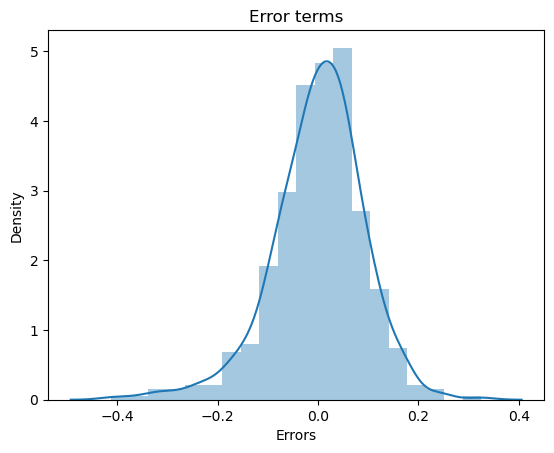

In [182]:
# Plotting the histogram of the error terms
sns.distplot((res), bins = 20)
plt.title('Error terms')
plt.xlabel('Errors')

From the above graph, we could see that the residuals are normally distributed. Hence our assumption for linear regression is valid

# Making predictions using test model

##### Now that we have fitted the model and checked the assumptions, its time to make the predictions using the final model lr7.
Applying the scaling on the test sets.

In [189]:
#  Scaling is to be done only on numeric features. We will ONLY transform the test sets.
df_test[['temp', 'atemp', 'humidity', 'windspeed','count']]=scaler.transform(df_test[['temp', 'atemp', 'humidity', 'windspeed','count']])

In [191]:
# Check the details about df_test to ascertain the transform has taken place properly.
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.554033,0.532725,0.633950,0.315639,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233272,0.213047,0.148943,0.155269,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.030303,0.025641,0.257732,-0.031250,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.358974,0.520619,0.218750,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545455,0.538462,0.618557,0.312500,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757576,0.717949,0.742268,0.406250,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.969697,0.974359,1.000000,0.781250,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
# Dividing the datafrem into X and y sets for the model building
y_test = df_test.pop('count')
X_test = df_test

In [195]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        219 non-null    int32  
 1   holiday     219 non-null    int32  
 2   workingday  219 non-null    int32  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   humidity    219 non-null    float64
 6   windspeed   219 non-null    float64
 7   season_2    219 non-null    int32  
 8   season_3    219 non-null    int32  
 9   season_4    219 non-null    int32  
 10  month_2     219 non-null    int32  
 11  month_3     219 non-null    int32  
 12  month_4     219 non-null    int32  
 13  month_5     219 non-null    int32  
 14  month_6     219 non-null    int32  
 15  month_7     219 non-null    int32  
 16  month_8     219 non-null    int32  
 17  month_9     219 non-null    int32  
 18  month_10    219 non-null    int32  
 19  month_11    219 non-null    int32

In [197]:
# Selecting the variables that were the part of final model i.e. model 7.
col1=X_train_new_5.columns
X_test = X_test[col1]

# Adding constant to the test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      219 non-null    float64
 1   year       219 non-null    int32  
 2   holiday    219 non-null    int32  
 3   temp       219 non-null    float64
 4   windspeed  219 non-null    float64
 5   season_2   219 non-null    int32  
 6   season_4   219 non-null    int32  
 7   month_9    219 non-null    int32  
 8   weather_2  219 non-null    int32  
 9   weather_3  219 non-null    int32  
dtypes: float64(3), int32(7)
memory usage: 12.8 KB


In [199]:
# Making predictions using the final model lr7
y_pred = lr7.predict(X_test_lm7)

#### Model Evaluation

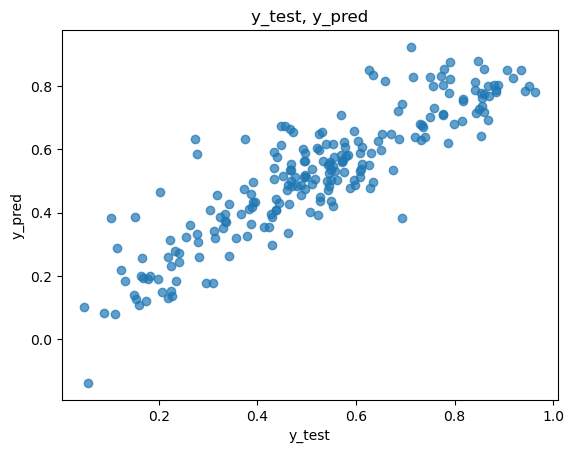

In [202]:
# Plotting y_test and y_pred to understand the scatter.
plt.scatter(y_test, y_pred, alpha = 0.7)
plt.title('y_test, y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# R^2 and Adjsuted R2 

#### R2 Value for test

In [205]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7905595257686617

#### Adjusted R2 Value for test

In [212]:
# we already have r2 from above
r2=0.7905595257686617

# n is number of rows in X
n = X_test.shape[0]

# p is the number of features in X
p = X_test.shape[1]

# Adjsuted r2
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7815405579787955

# Final result comparison

##### 
Train R2 = 0.830 , 
Adjusted Train R2 = 0.827 , 
Test R2 = 0.791 , 
Adjusted Test R2 = 0.781

This seems to be a good model.

# FINAL REPORT
As per our final Model (Model 7), the top 3 predictor variables that influences the bike booking are:

1. Temperature (temp) - A coefficient value of ‘0.5490’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5490 units.
2. Weather Situation 3 (weather_3) - A coefficient value of ‘-0.2854’ indicated that, w.r.t Weather_1, a unit increase in Weather_3 variable decreases the bike hire numbers by 0.2854 units.
3. Year (yr) - A coefficient value of ‘0.2321’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2321 units.
So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are

1. season_4: - A coefficient value of ‘0.1295’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1295 units.
2. windspeed: - A coefficient value of ‘-0.1549’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1549 units.

